This model uses the labelled dataset of X-ray images of healthy, Covid-19 infected, Bacterial Pneumonia infected and Viral Pneumonia infected people, to learn to classify the input images into four labels namely: Healthy, Covid-19, Bacterial Pneumonia, Viral Pneumonia.  

## Setup

In [1]:
## importing libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
## importing tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
pip install opencv-python

In [3]:
## importing cv2 library
import cv2

## Dataset
In this model, Training_Data and Testing_Data, each consisting of 4 folders namely Healthy, Covid19, Bacterial_Pneumonia, Viral_Pneumonia serve as our datasets

In [4]:
# Load Dataset
labels = 4 # HEALTHY, VIRAL_PNEUMONIA, BACTERIAL_PNEUMONIA, COVID19 ##num_classes
image_size = (224,224) ##target_size
## path = "" ##chest_xray_dir
train_path = "Training_Data/" ##train_dir
test_path   = "Testing_Data/" ##val_dir

## Data Exploration

The Training_Data contains a total of 542 images, while the Testing_Data contains a total of 40 images.


In [5]:
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:10]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')  

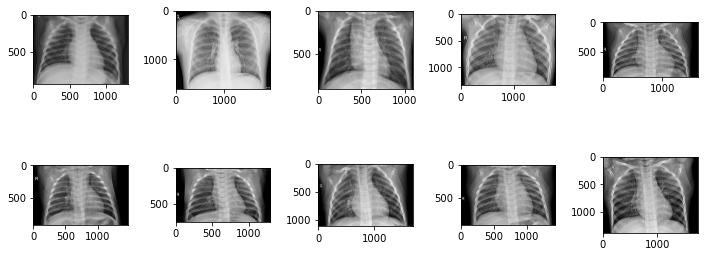

In [6]:
plot_imgs(train_path+'Healthy')

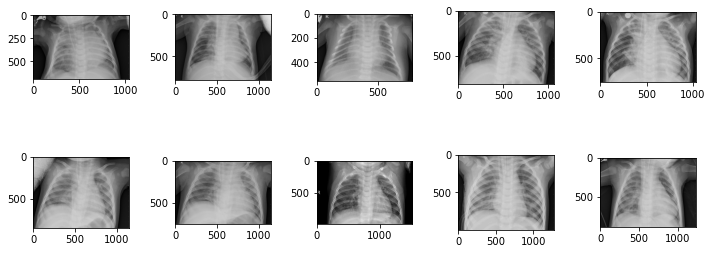

In [7]:
 plot_imgs(train_path+'Bacterial_Pneumonia')

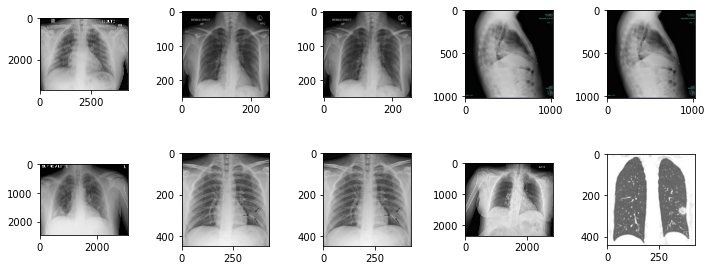

In [8]:
plot_imgs(train_path+'covid19')

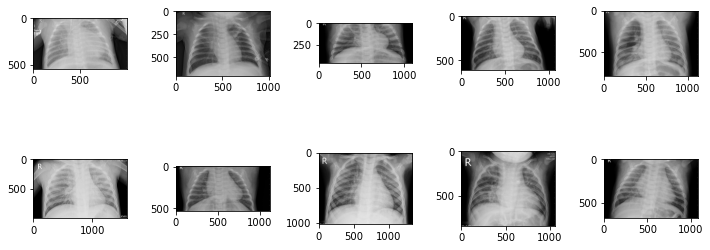

In [9]:
plot_imgs(train_path+'Viral_Pneumonia')

In [10]:
# Data Generator
rescale = 1./255

In [11]:
train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    class_mode='categorical',
    batch_size=32,
    color_mode="grayscale",	
    shuffle=True)

Found 542 images belonging to 4 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=rescale)

In [14]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    class_mode='categorical',
    batch_size=8,
    color_mode="grayscale",
    shuffle = False)

Found 40 images belonging to 4 classes.


## Creating the Model


In [15]:
# Build Model
model = Sequential()

# 1st Conv layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1), padding='same'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 2nd Conv layer
## model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 3rd Conv layer
## model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 4th Conv layer
## model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 5th Conv layer
## model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
## model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [16]:
# Fully-Connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(labels, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12845120  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2

In [18]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train Model
num_epochs = 11
history = model.fit_generator(generator=train_generator, 
                    steps_per_epoch=train_generator.n // train_generator.batch_size, 
                    epochs=num_epochs, 
                    validation_data=test_generator, 
                    validation_steps=test_generator.n // test_generator.batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/11
16/16 [==============================] - 31s 2s/step - loss: 3.1833 - accuracy: 0.2804 - val_loss: 1.3427 - val_accuracy: 0.4250
Epoch 2/11
16/16 [==============================] - 30s 2s/step - loss: 1.2202 - accuracy: 0.4412 - val_loss: 1.0312 - val_accuracy: 0.6750
Epoch 3/11
16/16 [==============================] - 29s 2s/step - loss: 1.0629 - accuracy: 0.5392 - val_loss: 0.9568 - val_accuracy: 0.5750
Epoch 4/11
16/16 [==============================] - 31s 2s/step - loss: 0.9320 - accuracy: 0.6176 - val_loss: 0.8777 - val_accuracy: 0.6500
Epoch 5/11
16/16 [==============================] - 31s 2s/step - loss: 0.7956 - accuracy: 0.7020 - val_loss: 0.7492 - val_accuracy: 0.7500
Epoch 6/11
16/16 [==============================] - 31s 2s/step - loss: 0.7057 - accuracy: 0.7216 - val_loss: 0.8192 - val_accuracy: 0.6750
Epoch 7/11
16/16 [==============================] - 33s 2s/step - loss: 0.6856 - acc

In [20]:
# Evaluate Model
result = model.evaluate_generator(test_generator, steps=len(test_generator))
print("%s%.2f  " % ("Loss     : ", result[0]))
print("%s%.2f%s" % ("Accuracy : ", result[1]*100, "%"))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss     : 0.64  
Accuracy : 85.00%


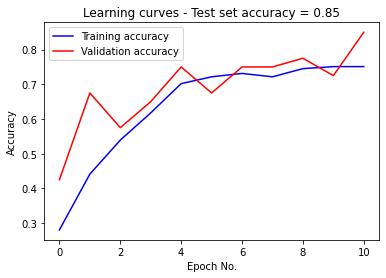

In [21]:
# Plot learning curves and compute accuracy on the test set
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
test_accuracy = result[1]
plt.plot(range(len(accuracy)), accuracy, color='blue', label='Training accuracy')
plt.plot(range(len(accuracy)), val_accuracy, color='red', label='Validation accuracy')
plt.title('Learning curves - Test set accuracy = ' + str(round(test_accuracy, 3)))
plt.xlabel('Epoch No.')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Predict
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

numofbatch = len(test_generator)
batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)
sizeofbatch = len(y_true_batch)

Instructions for updating:
Please use Model.predict, which supports generators.
5/5 [==============================] - 1s 134ms/step


In [23]:
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 2
-----------------------------------
Batch Size              : 8
-----------------------------------
Accuracy                : 85.00%
-----------------------------------
